In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [109]:
#colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("diabetes.csv")#,names=colnames)

In [110]:
X =  prima_df.drop("Outcome", axis=1)
Y =  prima_df.Outcome

In [111]:
prima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=5,scoring='recall')
GS.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [121]:
GS.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [122]:
KNN=KNeighborsClassifier(n_neighbors=12,weights='distance')

In [123]:
from sklearn.ensemble import BaggingClassifier
knn_bag=BaggingClassifier(base_estimator=KNN,random_state=0)

In [124]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param2={'n_estimators':np.arange(1,100)}
GS2=GridSearchCV(knn_bag,param2,cv=kf,scoring='recall')
GS2.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='distance'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [125]:
GS2.best_params_

{'n_estimators': 80}

In [126]:
LR=LogisticRegression()

In [127]:
LR_bag=BaggingClassifier(base_estimator=LR,random_state=0)

In [128]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param2={'n_estimators':np.arange(1,100)}
GS2=GridSearchCV(LR_bag,param2,cv=kf,scoring='recall')
GS2.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=...n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [129]:
GS2.best_params_

{'n_estimators': 69}

In [130]:
NB=GaussianNB()

In [131]:
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=0)

In [132]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param2={'n_estimators':np.arange(1,100)}
GS2=GridSearchCV(NB_bag,param2,cv=kf,scoring='recall')
GS2.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [133]:
GS2.best_params_

{'n_estimators': 1}

In [139]:
Dt_model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0)
Dt_model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [140]:
ypred2=model2.predict(Xtest)

In [58]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)

In [83]:
Dt_model2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
Dt_model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [81]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )

In [61]:
bag_model = BaggingClassifier(n_estimators=10,random_state=10)

In [62]:
param={'n_n'}

In [63]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('Dt Regularized', Dt_model2))
models.append(('RandomForest', Rf_model))
models.append(('Bagged DT', bag_model))
models.append(('LR BAG', LR_bag))
models.append(('Bagged DT', bag_model))


DecisionTree: 0.562904 (0.004411)
Dt Regularized: 0.647672 (0.005292)
RandomForest: 0.615826 (0.001247)
Bagged DT: 0.571147 (0.008071)
LR BAG: 0.544196 (0.002432)
Bagged DT: 0.571147 (0.008071)


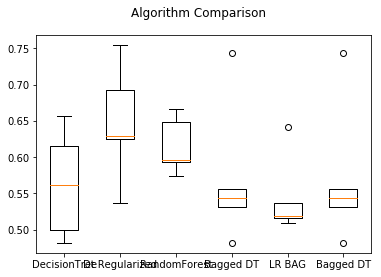

In [64]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X,Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
names

['DecisionTree',
 'Dt Regularized',
 'RandomForest',
 'Bagged DT',
 'LR BAG',
 'Bagged DT']

In [66]:
results

[array([0.5       , 0.65625   , 0.56140351, 0.61538462, 0.48148148]),
 array([0.62962963, 0.625     , 0.75438596, 0.69230769, 0.53703704]),
 array([0.64814815, 0.59375   , 0.59649123, 0.66666667, 0.57407407]),
 array([0.48148148, 0.53125   , 0.54385965, 0.74358974, 0.55555556]),
 array([0.53703704, 0.515625  , 0.50877193, 0.64102564, 0.51851852]),
 array([0.48148148, 0.53125   , 0.54385965, 0.74358974, 0.55555556])]

In [67]:
#bias error extent:
(0.615826 - 0.562904) / 0.615826

0.08593661196506809

In [68]:
#variance error extent:
(0.004411 - 0.001247)/0.004411

0.7172976649285877

In [69]:

LR = LogisticRegression()
NB = GaussianNB()
LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=15,random_state=0)
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=0)
KNN = KNeighborsClassifier(n_neighbors = 12,weights='distance')
knn_bag=BaggingClassifier(base_estimator=KNN,n_estimators=880,random_state=0)
DT_reg = DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=0)
bag_DT = BaggingClassifier(n_estimators=10,random_state=0)
RF = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )
#boosting
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=170)
NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=250)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=50)
DT_boost=AdaBoostClassifier(n_estimators=50)
GB_boost=GradientBoostingClassifier(n_estimators=100)

In [71]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf = KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,LR_boost,NB,NB_boost,KNN,DT_boost,RF,RF_boost,GB_boost],
                       ['LR','LR_boost','NB','NB_boost','DT_boost','RF','RF_boost','GB_boost']):
    roc_auc = []
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        fpr,tpr,_ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr,tpr))
    print("AUC scores: %0.02f(+/- %0.5f)[%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores: 0.71(+/- 0.00138)[LR]
AUC scores: 0.70(+/- 0.00201)[LR_boost]
AUC scores: 0.72(+/- 0.00219)[NB]
AUC scores: 0.56(+/- 0.00325)[NB_boost]
AUC scores: 0.70(+/- 0.00130)[DT_boost]
AUC scores: 0.70(+/- 0.00229)[RF]
AUC scores: 0.70(+/- 0.00024)[RF_boost]
AUC scores: 0.70(+/- 0.00062)[GB_boost]


In [72]:
from sklearn.metrics import roc_curve, auc
kf = KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,LR_bag,NB,NB_bag,KNN,knn_bag,DT_reg,bag_DT,RF],
                       ['LR','LR_bag','NB','NB_bag','KNN','knn_bag','DT_reg','bag_DT','RF']):
    roc_auc = []
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        fpr,tpr,_ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr,tpr))
    print("AUC scores: %0.02f(+/- %0.5f)[%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores: 0.71(+/- 0.00138)[LR]
AUC scores: 0.71(+/- 0.00206)[LR_bag]
AUC scores: 0.72(+/- 0.00219)[NB]
AUC scores: 0.71(+/- 0.00269)[NB_bag]
AUC scores: 0.70(+/- 0.00130)[KNN]
AUC scores: 0.70(+/- 0.00112)[knn_bag]
AUC scores: 0.72(+/- 0.00259)[DT_reg]
AUC scores: 0.69(+/- 0.00059)[bag_DT]
AUC scores: 0.70(+/- 0.00024)[RF]


In [73]:
stacked=VotingClassifier(estimators=[('Bagged_LR',LR_bag),('BoostedRF',RF_boost),('GB_Boost',GB_boost)],voting='soft')

In [74]:
from sklearn.metrics import roc_curve, auc
kf = KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,LR_bag,NB,NB_bag,KNN,knn_bag,DT_reg,bag_DT,RF,stacked],
                       ['LR','LR_bag','NB','NB_bag','KNN','knn_bag','DT_reg','bag_DT','RF','Stacked']):
    roc_auc = []
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        fpr,tpr,_ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr,tpr))
    print("AUC scores: %0.02f(+/- %0.5f)[%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores: 0.71(+/- 0.00138)[LR]
AUC scores: 0.71(+/- 0.00206)[LR_bag]
AUC scores: 0.72(+/- 0.00219)[NB]
AUC scores: 0.71(+/- 0.00269)[NB_bag]
AUC scores: 0.70(+/- 0.00130)[KNN]
AUC scores: 0.70(+/- 0.00112)[knn_bag]
AUC scores: 0.72(+/- 0.00259)[DT_reg]
AUC scores: 0.69(+/- 0.00059)[bag_DT]
AUC scores: 0.70(+/- 0.00024)[RF]
AUC scores: 0.72(+/- 0.00233)[Stacked]


In [75]:
stacked=VotingClassifier(estimators=[('Bagged_LR',LR_bag),('BoostedRF',RF_boost),('GB_Boost',GB_boost)],voting='hard')

In [76]:
from sklearn.metrics import roc_curve, auc
kf = KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,LR_bag,NB,NB_bag,KNN,knn_bag,DT_reg,bag_DT,RF,stacked],
                       ['LR','LR_bag','NB','NB_bag','KNN','knn_bag','DT_reg','bag_DT','RF','Stacked']):
    roc_auc = []
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        fpr,tpr,_ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr,tpr))
    print("AUC scores: %0.02f(+/- %0.5f)[%s]" %(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))

AUC scores: 0.71(+/- 0.00138)[LR]
AUC scores: 0.71(+/- 0.00206)[LR_bag]
AUC scores: 0.72(+/- 0.00219)[NB]
AUC scores: 0.71(+/- 0.00269)[NB_bag]
AUC scores: 0.70(+/- 0.00130)[KNN]
AUC scores: 0.70(+/- 0.00112)[knn_bag]
AUC scores: 0.72(+/- 0.00259)[DT_reg]
AUC scores: 0.69(+/- 0.00059)[bag_DT]
AUC scores: 0.70(+/- 0.00024)[RF]
AUC scores: 0.71(+/- 0.00150)[Stacked]
